In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("Setup complete!")

Setup complete!


In [ ]:
# Load the YOLOv8 nano model
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 81.2MB/s]


In [ ]:
# Download a sample traffic image
!wget https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg -O traffic_sample.jpg

--2025-03-13 08:58:53--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487438 (476K) [image/jpeg]
Saving to: ‘traffic_sample.jpg’

traffic_sample.jpg  100%[===================>] 476.01K  --.-KB/s    in 0.04s   

2025-03-13 08:58:53 (12.9 MB/s) - ‘traffic_sample.jpg’ saved [487438/487438]




0: 640x480 4 persons, 1 bus, 39.7ms
Speed: 12.2ms preprocess, 39.7ms inference, 312.3ms postprocess per image at shape (1, 3, 640, 480)


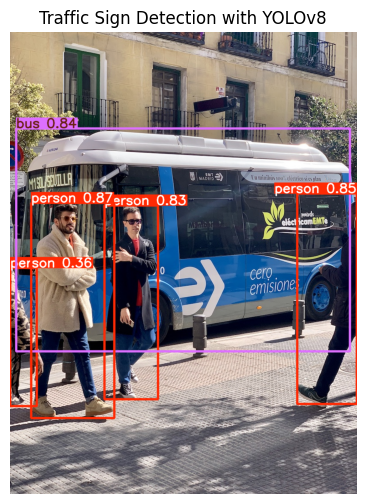

In [ ]:
# Load the image
image_path = 'traffic_sample.jpg'  # Replace with your file if uploaded
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Run YOLOv8 inference
results = model(image_rgb)

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(results[0].plot())  # Plot detections
plt.title("Traffic Sign Detection with YOLOv8")
plt.axis('off')
plt.show()

In [ ]:
# Process a video frame-by-frame
video_path = 'traffic_video.mp4'  # Replace with your video file
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(frame_rgb)

    # Display the frame (in Colab, use matplotlib)
    plt.imshow(results[0].plot())
    plt.axis('off')
    plt.show()
    plt.clf()  # Clear the figure for the next frame

cap.release()

In [ ]:
from multiprocessing import Pool

def process_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(frame_rgb)
    return results[0].plot()

cap = cv2.VideoCapture(video_path)
frames = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()

# Process frames in parallel
with Pool(4) as p:
    processed_frames = p.map(process_frame, frames[:20])  # Limit to 20 frames for demo

# Display a few results
for i, frame in enumerate(processed_frames[:5]):
    plt.figure(figsize=(10, 6))
    plt.imshow(frame)
    plt.title(f"Frame {i+1}")
    plt.axis('off')
    plt.show()

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.export(format="onnx")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 286.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 269.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 224.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 249.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 316.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.4s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starti

'yolov8n.onnx'

In [ ]:
git init

SyntaxError: invalid syntax (<ipython-input-4-f188d5ac1197>, line 1)